# Interaction of the center and the periphery
## Kirill Zakharov
2022

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.integrate import odeint, RK45, solve_ivp
%matplotlib inline

plt.style.use('ggplot')

In [6]:
def Nc_fun(ac, Tc, Nc, Ec, aq, Np, CN):
    return ac * Tc * Nc * (1-Ec) + aq * Np * CN

def Tc_fun(bc, Tc, Ec):
    return bc * Tc * Ec

def Ec_fun(cc, Tc, Ec):
    return cc * Tc * Ec * (1-Ec)

def Np_fun(ap, Tp, Np, Ep, aq, CN):
    return ap * Tp * Np * (1-Ep) - aq * Np * CN

def Tp_fun(bp, Tp, Ep, bq, Tc, CT):
    return bp * Tp * Ep + bq * Tc * CT

def Ep_fun(cp, Tp, Ep, cq, Ec, CE):
    return cp * Tp * Ep * (1-Ep) + cq*Ec*CE

In [16]:
def euler(N, step, Nc0, Tc0, Ec0, Np0, Tp0, Ep0, ac, bc, cc, ap, bp, cp, aq, bq, cq, CN, CT, CE, ec, ep):
    Nc = np.zeros(N+1)
    Tc = np.zeros(N+1)
    Ec = np.zeros(N+1)
    Np = np.zeros(N+1)
    Tp = np.zeros(N+1)
    Ep = np.zeros(N+1)
    
    Nc[0] = Nc0
    Tc[0] = Tc0
    Ec[0] = Ec0
    Np[0] = Np0
    Tp[0] = Tp0
    Ep[0] = Ep0
    
    Yc = np.zeros(N+1)
    Yp = np.zeros(N+1)
    
    Yc[0] = Tc[0] * ec * Nc[0]
    Yp[0] = Tp[0] * ep * Np[0]
    
    for t in range(N):
        Nc[t+1] = Nc[t] + step * Nc_fun(ac, Tc[t], Nc[t], Ec[t], aq, Np[t], CN(Tc[t], Ec[t], Yc[t]))
        Tc[t+1] = Tc[t] + step * Tc_fun(bc, Tc[t], Ec[t])
        Ec[t+1] = Ec[t] + step * Ec_fun(cc, Tc[t], Ec[t])
        
        Yc[t+1] = Tc[t] * ec * Nc[t]
        
        Np[t+1] = Np[t] + step * Np_fun(ap, Tp[t], Np[t], Ep[t], aq, CN(Tp[t], Ep[t], Yp[t]))
        Tp[t+1] = Tp[t] + step * Tp_fun(bp, Tp[t], Ep[t], bq, Tc[t], CT(Tp[t], Ep[t], Yp[t]))
        Ep[t+1] = Ep[t] + step * Ep_fun(cp, Tp[t], Ep[t], cq, Ec[t], CE(Tp[t], Ep[t], Yp[t]))
        
        Yp[t+1] = Tp[t] * ep * Np[t]
        
    return Nc, Tc, Ec, Np, Tp, Ep, Yc, Yp

In [26]:
N = 20 
step = 0.02

Nc0 = 1 
Tc0 = 1
Ec0 = 1
Np0 = 1
Tp0 = 1
Ep0 = 1

ac = 0.7
bc = 0.5
cc = 0.8
ap = 0.3
bp = 0.5
cp = 0.2
aq = 1
bq = 1
cq = 1

CN = lambda t,e,y: 0.8 * t * e * y
CT = lambda t,e,y: 0.1 * t * e * y
CE = lambda t,e,y: 0.2 * t * e * y
    
ec = 0.8
ep = 0.3

In [27]:
Nc, Tc, Ec, Np, Tp, Ep, Yc, Yp = euler(N, step, Nc0, Tc0, Ec0, Np0, Tp0, Ep0, ac, bc,\
                                       cc, ap, bp, cp, aq, bq, cq, CN, CT, CE, ec, ep)

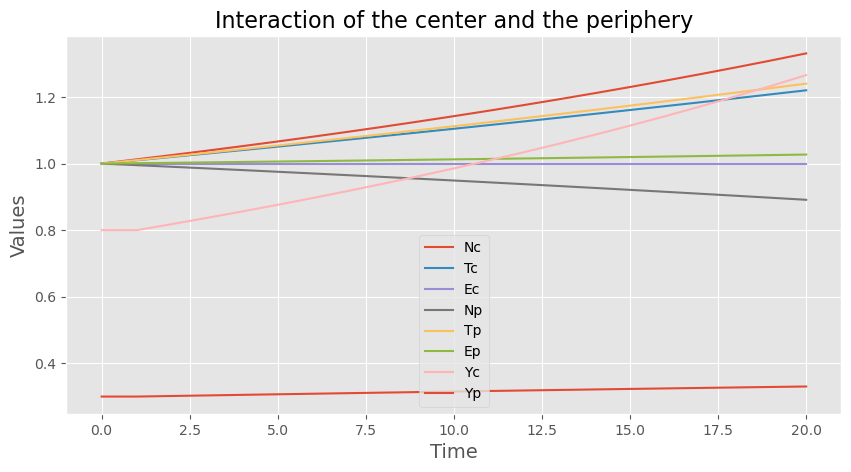

In [28]:
plt.subplots(figsize=(10, 5), dpi=100)

t = np.linspace(0,N,N+1)

plt.plot(t, Nc, label='Nc')
plt.plot(t, Tc, label='Tc')
plt.plot(t, Ec, label='Ec')
plt.plot(t, Np, label='Np')
plt.plot(t, Tp, label='Tp')
plt.plot(t, Ep, label='Ep')
plt.plot(t, Yc, label='Yc')
plt.plot(t, Yp, label='Yp')


plt.legend()
plt.title('Interaction of the center and the periphery', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.show()